In [45]:
# Importing the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, datasets, model_selection, metrics

In [46]:
# Importing the datset

dataset = datasets.load_digits()
print(dir(dataset))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [47]:
print(dataset.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [48]:
print(dataset.target_names)

[0 1 2 3 4 5 6 7 8 9]


<Figure size 432x288 with 0 Axes>

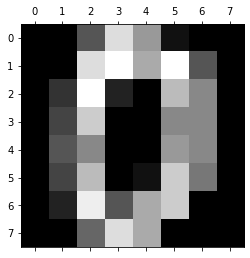

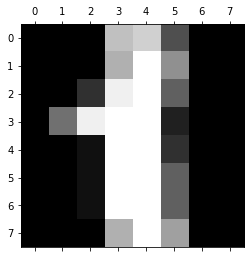

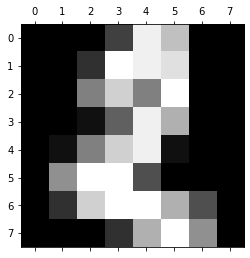

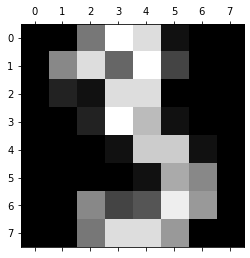

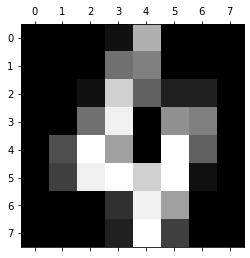

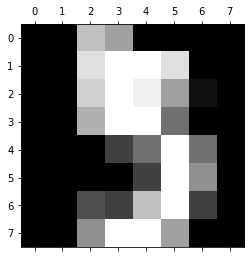

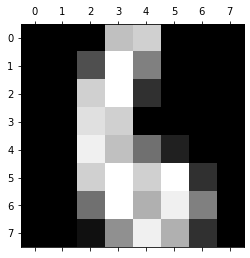

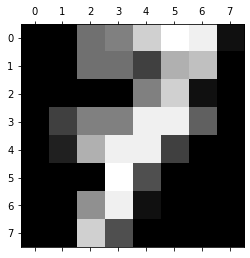

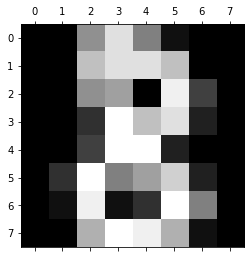

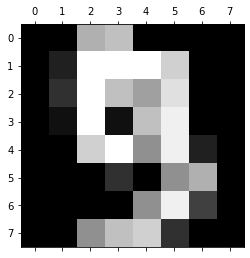

In [49]:
# Visualizing the digits (Multi-D array)

for image in dataset.images[:10]:
    plt.gray()
    plt.matshow(image)

In [50]:
# Loading the dataset into a dataframe

df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['target'] = dataset.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


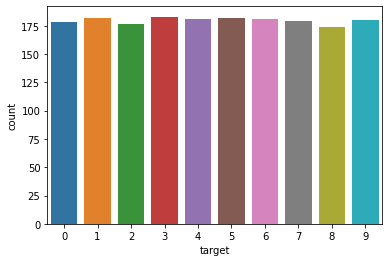

In [51]:
sns.countplot(x = 'target', data = df)
plt.show()

In [52]:
# Splitting the data into training and testing data

X = df.drop('target', axis = 1).values
y = df['target'].values

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 1)

In [53]:
# Fitting the model with training data

model = linear_model.LogisticRegression(max_iter = 10000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [54]:
# Making predictions

y_predicted = model.predict(X_test)

In [55]:
# Checking the accuracy of the model

print(model.score(X_test, y_test))

print(metrics.r2_score(y_test, y_predicted))

print(metrics.classification_report(y_test, y_predicted))

0.9722222222222222
0.9634077766867253
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.97      1.00      0.99        35
           2       1.00      1.00      1.00        36
           3       0.98      0.98      0.98        41
           4       0.95      1.00      0.97        38
           5       0.88      0.93      0.90        30
           6       1.00      1.00      1.00        37
           7       1.00      0.95      0.97        37
           8       0.93      0.93      0.93        29
           9       1.00      0.94      0.97        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



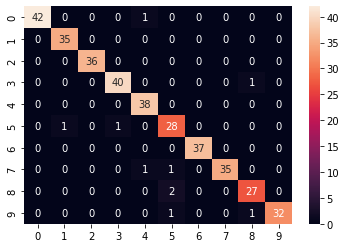

In [59]:
# Analyzing the confusion matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_predicted), annot = True)
plt.show()